In [1]:
!git clone https://github.com/openai/point-e.git


Cloning into 'point-e'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 57 (delta 1), reused 1 (delta 1), pack-reused 50 (from 1)
Receiving objects: 100% (57/57), 1.56 MiB | 19.54 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [10]:
%cd point-e
!pip install -e .


/content/point-e
Obtaining file:///content/point-e
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-install-9dgx1tva/clip_53af4ca2979043a99a29981246c9a6af
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-install-9dgx1tva/clip_53af4ca2979043a99a29981246c9a6af
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
  Attempting uninstall: point-e
    Found existing installation: point-e 0.0.0
    Uninstalling point-e-0.0.0:
      Successfully uninstalled point-e-0.0.0
  Running setup.py develop for point-e


In [3]:
!pip install torch torchvision
!pip install diffusers transformers
!pip install open3d  # Para visualizacion en 3d

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.7/447.7 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 88.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 73.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 62.2 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: flask
    Found existing installation: Flask 3.1.0
    Unins

In [4]:
!pip install  clip filelock fire humanize matplotlib numpy Pillow requests scikit-image scipy torch tqdm

In [5]:
!pip install diffusers transformers open3d matplotlib

In [11]:
!pip show point-e

Name: point-e
Version: 0.0.0
Summary: 
Home-page: 
Author: OpenAI
Author-email: 
License: 
Location: /content/point-e
Editable project location: /content/point-e
Requires: clip, filelock, fire, humanize, matplotlib, numpy, Pillow, requests, scikit-image, scipy, torch, tqdm
Required-by: 


In [12]:
import torch
from PIL import Image
from tqdm.auto import tqdm
import point_e #as pe  # Usamos un alias para evitar conflictos
from diffusers import StableDiffusionPipeline
from IPython.display import Image as DisplayImage

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Usando dispositivo: cuda


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Imagen guardada en: stable_diffusion_generated_image.png


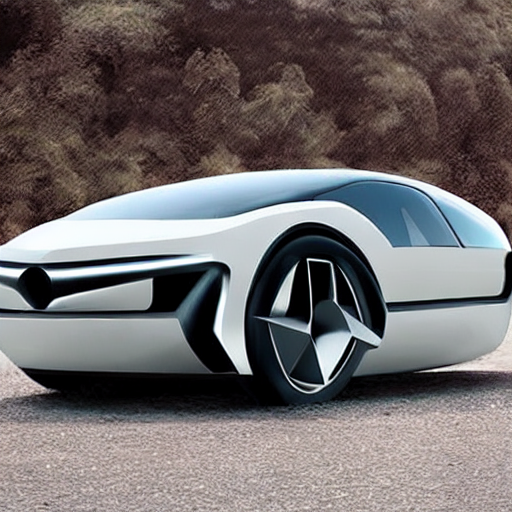

In [25]:
# Configuración inicial
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Usando dispositivo: {device}")

# Función para generar imagen con Stable Diffusion
def generate_image(prompt: str, output_path: str = "generated_image.png"):
    model_id = "runwayml/stable-diffusion-v1-5"
    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to(device)
    with torch.no_grad():
        image = pipe(prompt, num_inference_steps=50, guidance_scale=7.5).images[0]
    image.save(output_path)
    print(f"Imagen guardada en: {output_path}")
    return image

# Ejemplo de uso
prompt = "Do a futuristic car"
image_path = "stable_diffusion_generated_image.png"
generated_image = generate_image(prompt, image_path)

# Mostrar la imagen generada
DisplayImage(filename=image_path)

In [27]:
from PIL import Image
import torch
from tqdm.auto import tqdm

from point_e.diffusion.configs import DIFFUSION_CONFIGS, diffusion_from_config
from point_e.diffusion.sampler import PointCloudSampler
from point_e.models.download import load_checkpoint
from point_e.models.configs import MODEL_CONFIGS, model_from_config
from point_e.util.plotting import plot_point_cloud

# Configurar el dispositivo (GPU si está disponible, de lo contrario CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Crear el modelo base
print('Creando modelo base...')
base_name = 'base300M'  # Puedes cambiar a 'base300M' o 'base1B' para mejor calidad
base_model = model_from_config(MODEL_CONFIGS[base_name], device)
base_model.eval()
base_diffusion = diffusion_from_config(DIFFUSION_CONFIGS[base_name])

# Crear el modelo de upsampling
print('Creando modelo de upsampling...')
upsampler_model = model_from_config(MODEL_CONFIGS['upsample'], device)
upsampler_model.eval()
upsampler_diffusion = diffusion_from_config(DIFFUSION_CONFIGS['upsample'])

# Cargar los checkpoints de los modelos
print('Cargando checkpoint del modelo base...')
base_model.load_state_dict(load_checkpoint(base_name, device))
print('Cargando checkpoint del modelo de upsampling...')
upsampler_model.load_state_dict(load_checkpoint('upsample', device))

# Crear el sampler
sampler = PointCloudSampler(
    device=device,
    models=[base_model, upsampler_model],
    diffusions=[base_diffusion, upsampler_diffusion],
    num_points=[1024, 4096 - 1024],
    aux_channels=['R', 'G', 'B'],
    guidance_scale=[3.0, 3.0],
)


Creando modelo base...
Creando modelo de upsampling...
Cargando checkpoint del modelo base...


  0%|          | 0.00/1.25G [00:00<?, ?iB/s]

Cargando checkpoint del modelo de upsampling...


Cargando imagen: stable_diffusion_generated_image.png
Generando modelo 3D basado en la imagen...


0it [00:00, ?it/s]

Mostrando el modelo 3D generado...


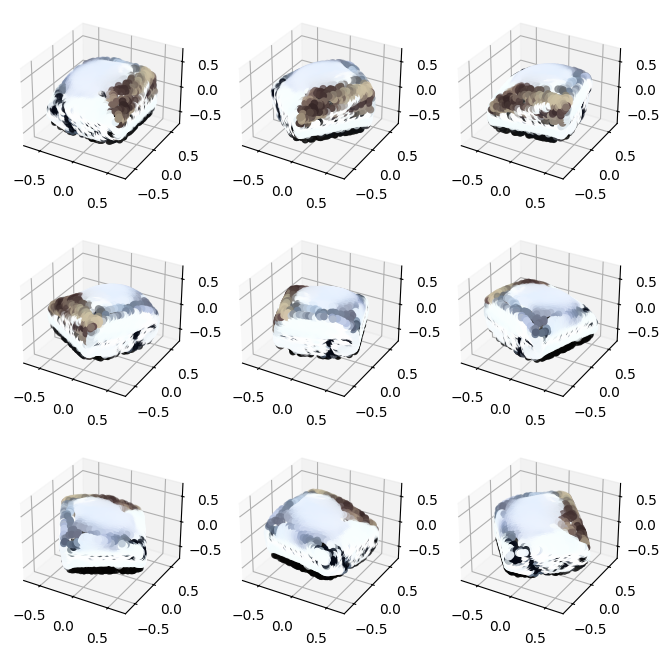

In [28]:

# Cargar una imagen como condición
img_path = 'stable_diffusion_generated_image.png'  # Cambia esto por la ruta de tu imagen
print(f'Cargando imagen: {img_path}')
img = Image.open(image_path)

# Generar la nube de puntos
print('Generando modelo 3D basado en la imagen...')
samples = None
for x in tqdm(sampler.sample_batch_progressive(batch_size=1, model_kwargs=dict(images=[img]))):
    samples = x

# Convertir la salida a una nube de puntos
pc = sampler.output_to_point_clouds(samples)[0]

# Graficar la nube de puntos
print('Mostrando el modelo 3D generado...')
fig = plot_point_cloud(pc, grid_size=3, fixed_bounds=((-0.75, -0.75, -0.75), (0.75, 0.75, 0.75)))
